In [1]:
import sys

sys.path.append(f"/home/npanj/personal_works/m5-forecasting-accuracy")

from src.utils.import_downcasting import import_downcasting
from src.utils.plotting import PdfFile
# from utils import get_wmape, plotting_sales_forecast, get_wmape_custom_groupby
import os
import numpy as np
import math
import seaborn as sns
import pandas as pd
import copy
import matplotlib.pyplot as plt

data_path = os.path.join(
    "/home/npanj/personal_works/m5-forecasting-accuracy/assets/data/data_CA_1"
)

In [2]:
data_ca1 = pd.read_csv(os.path.join(data_path, "dataset.csv"), low_memory=False)
data_ca1["date"] = pd.to_datetime(data_ca1["date"])
data_ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918109 entries, 0 to 5918108
Data columns (total 23 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   item_id       object        
 2   dept_id       object        
 3   cat_id        object        
 4   store_id      object        
 5   state_id      object        
 6   date_code     object        
 7   sales         int64         
 8   date          datetime64[ns]
 9   wm_yr_wk      int64         
 10  weekday       object        
 11  wday          int64         
 12  month         int64         
 13  year          int64         
 14  d             object        
 15  event_name_1  object        
 16  event_type_1  object        
 17  event_name_2  object        
 18  event_type_2  object        
 19  snap_CA       int64         
 20  snap_TX       int64         
 21  snap_WI       int64         
 22  sell_price    float64       
dtypes: datetime64[ns](1), float64(1)

In [3]:
print(f"number of item id = {str(len(data_ca1.item_id.unique()))}")
data_ca1.head().to_csv("example.csv")

number of item id = 3049


In [ ]:
# sns.relplot(x="date", y="sales", hue="item_id", kind="line", data=data_ca1, legend=False, height=8, aspect=2)

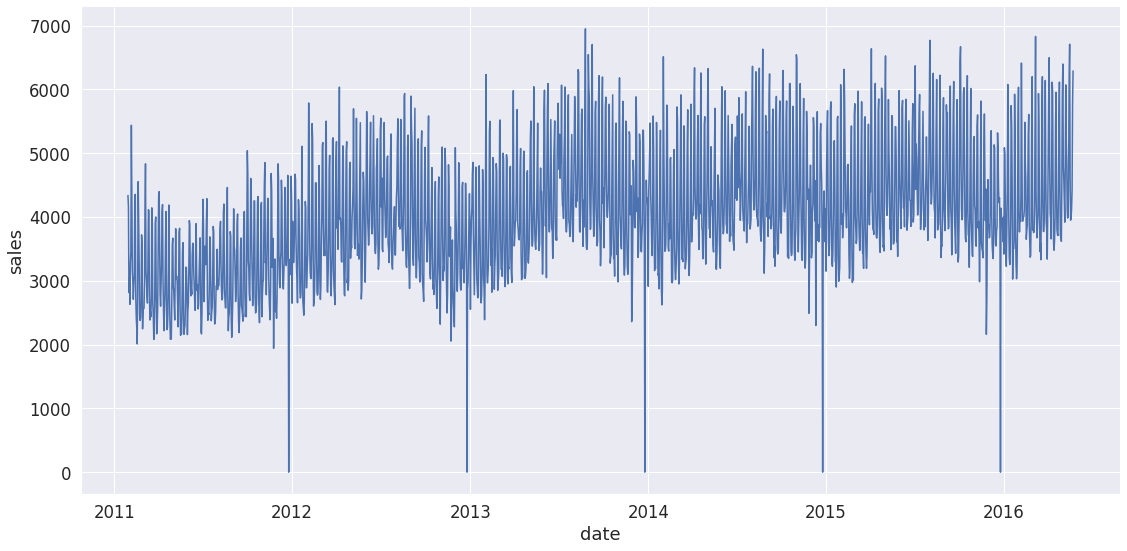

In [14]:
sales_daily = data_ca1[["date", "sales"]].groupby(["date"]).sales.sum().reset_index()

sns.set(font_scale = 1.5)
sns.relplot(x="date", y="sales", kind="line", data=sales_daily, height=8, aspect=2)

      cat_id  item_id   portion
0      FOODS     1437  0.471302
1    HOBBIES      565  0.185307
2  HOUSEHOLD     1047  0.343391
      cat_id    sales   portion
0      FOODS  5471661  0.698607
1    HOBBIES   892083  0.113899
2  HOUSEHOLD  1468504  0.187495


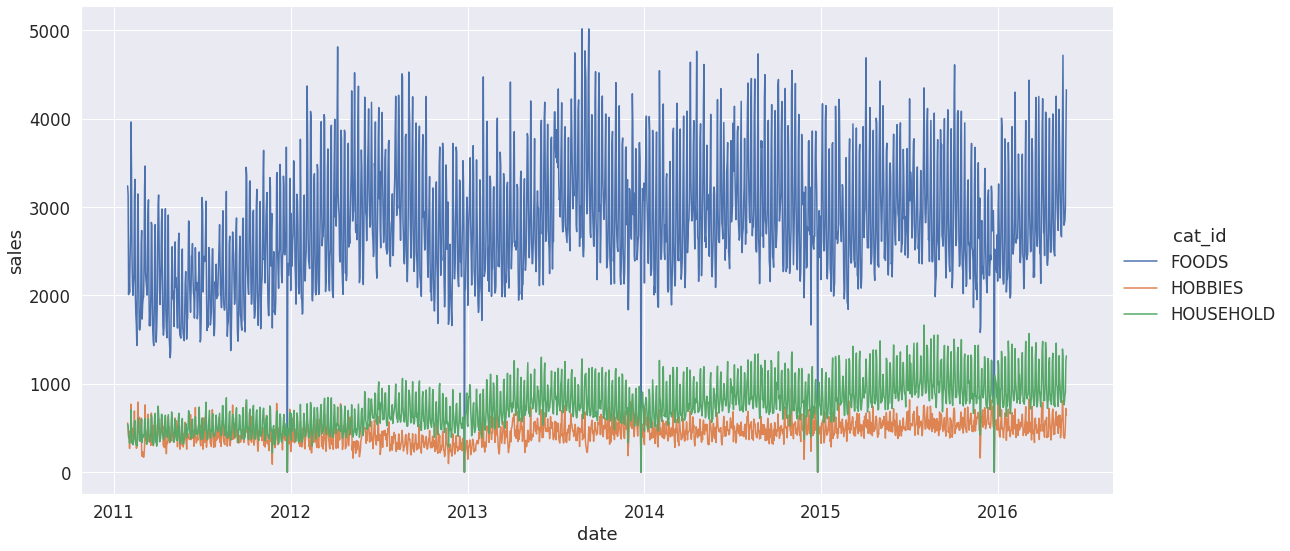

In [27]:
sales_cat_daily = data_ca1[["date", "cat_id", "sales"]].groupby(["date", "cat_id"])\
    .sales.sum().reset_index()

sns.set(font_scale = 1.5)
sns.relplot(x="date", y="sales", kind="line", hue="cat_id",data=sales_cat_daily, height=8, aspect=2)

item_per_cat = data_ca1[["cat_id", "item_id"]].groupby(["cat_id"]).item_id.nunique().reset_index()
item_per_cat["portion"] = item_per_cat["item_id"]/item_per_cat["item_id"].sum()
print(item_per_cat)

sales_per_cat = data_ca1[["cat_id", "sales"]].groupby(["cat_id"]).sales.sum().reset_index()
sales_per_cat["portion"] = sales_per_cat["sales"]/sales_per_cat["sales"].sum()
print(sales_per_cat)

       dept_id  item_id   portion
2      FOODS_3      823  0.269925
5  HOUSEHOLD_1      532  0.174483
6  HOUSEHOLD_2      515  0.168908
3    HOBBIES_1      416  0.136438
1      FOODS_2      398  0.130535
0      FOODS_1      216  0.070843
4    HOBBIES_2      149  0.048868
       dept_id    sales   portion
2      FOODS_3  3993834  0.509922
5  HOUSEHOLD_1  1121388  0.143176
1      FOODS_2   900391  0.114959
3    HOBBIES_1   835578  0.106684
0      FOODS_1   577436  0.073725
6  HOUSEHOLD_2   347116  0.044319
4    HOBBIES_2    56505  0.007214


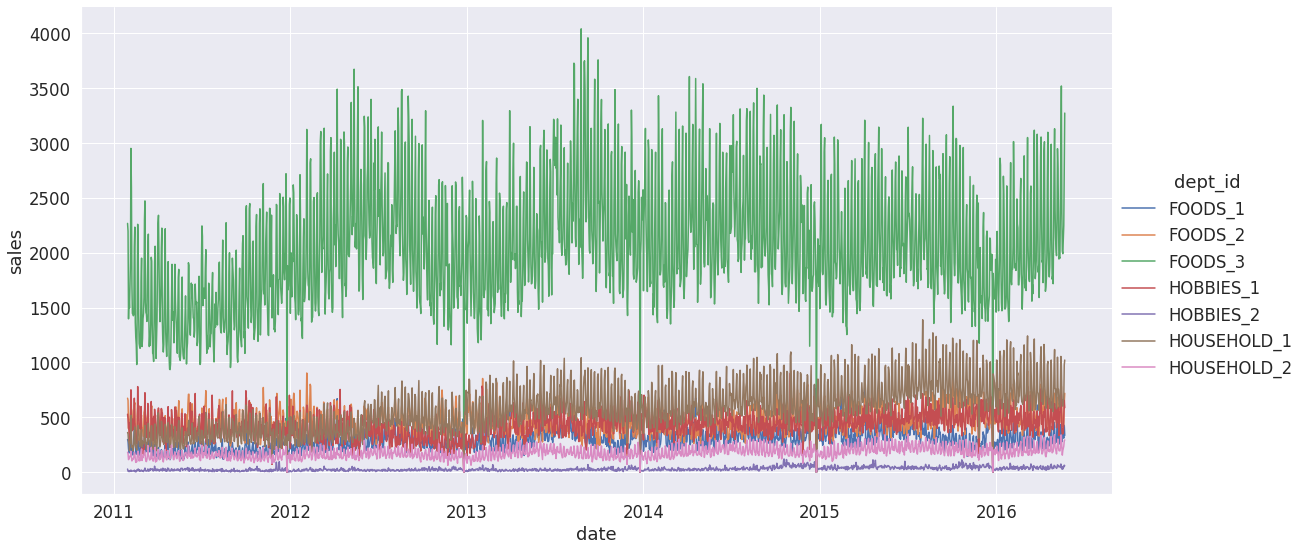

In [31]:
sales_dept_daily = data_ca1[["date", "dept_id", "sales"]].groupby(["date", "dept_id"])\
    .sales.sum().reset_index()

sns.set(font_scale = 1.5)
sns.relplot(x="date", y="sales", kind="line", hue="dept_id",data=sales_dept_daily, height=8, aspect=2)

item_per_debt = data_ca1[["dept_id", "item_id"]].groupby(["dept_id"]).item_id.nunique().reset_index()
item_per_debt["portion"] = item_per_debt["item_id"]/item_per_debt["item_id"].sum()
item_per_debt.sort_values(by="item_id", ascending=False, inplace=True)
print(item_per_debt)

sales_per_debt = data_ca1[["dept_id", "sales"]].groupby(["dept_id"]).sales.sum().reset_index()
sales_per_debt["portion"] = sales_per_debt["sales"]/sales_per_debt["sales"].sum()
sales_per_debt.sort_values(by="sales", ascending=False, inplace=True)
print(sales_per_debt)